In [2]:
import pydicom
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import ndimage

In [12]:
# path = r'C:\Users\allstar\Desktop\st_wt\skin-213\slice_0001.dcm'
path = r'C:\Users\allstar\Desktop\st_wt\bone_new_0821\slice_0001.dcm'
img =  pydicom.dcmread(path).pixel_array

print(np.unique(img))
path = r'C:\Users\allstar\Desktop\st_wt\skin-213\slice_0001.dcm'
img =  pydicom.dcmread(path).pixel_array
print(np.unique(img))
# img=np.rot90(img,k=2)
# plt.imshow(img,cmap='gray')
# plt.show()

# #定义windowing函数
# def windowing(img,window_width,window_center):
#     minWindow= float(window_center)-0.5*float(window_width)
#     new_img = (img-minWindow)/float(window_width)
#     new_img[new_img<0] = 0
#     new_img[new_img>1] =1
#     return (new_img*255).astype('uint8')

# # new_img = windowing(img,250,0)
# new_img = windowing(img,400,40)
# plt.imshow(new_img,cmap='gray')
# plt.show()

# #图像对比度增强
# clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(8,8))
# new_img = clahe.apply(new_img)
# new_img = new_img.astype('float32') / max(abs(np.unique(new_img)))
# plt.imshow(new_img,cmap='gray')
# plt.show()

[0 1]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 178 179 180
 181 182 190 194]


In [2]:
import nibabel as nib
import numpy as np

# 加载.nii.gz文件
nii_img = nib.load(r'D:\hhf\bone_nii\labelsTr\labels-104.nii.gz')  # 替换为你的文件路径
data = nii_img.get_fdata()

# 假设骨头的HU值范围是200到1000
# bone_hu_min = 300
# bone_hu_max = 1000
print(np.unique(data))
data[data <4.9 ] = 0
data[data >5.1 ] = 0
print(np.unique(data))
data[data >0.1 ] = 1

# 将非骨头部分的像素值设为0
# data[data < bone_hu_min] = 0
# data[data > bone_hu_max] = 0


# # 可选：保存修改后的图像
# new_nii_img = nib.Nifti1Image(data, nii_img.affine, nii_img.header)
# nib.save(new_nii_img, r'C:\Users\Administrator\Desktop\test\volume-325-bone.nii')  # 替换为保存路径

print("Conversion completed")

[0. 1. 3. 4. 5.]
[0. 5.]
Conversion completed


数据2

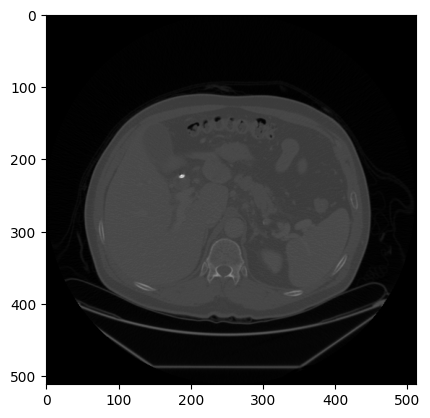

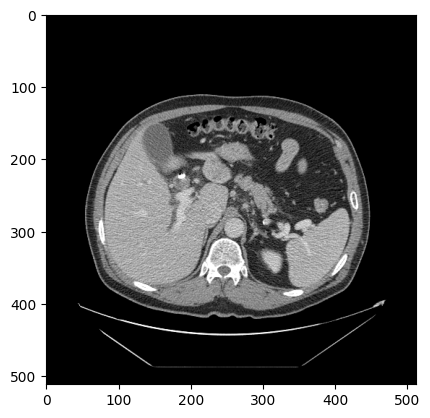

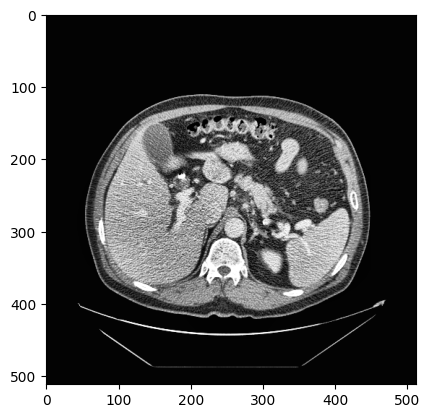

In [3]:
path = r'C:\Users\allstar\Desktop\hhf\volume-1\slice_0086.dcm'
img =  pydicom.dcmread(path).pixel_array
img=np.rot90(img,k=2)
plt.imshow(img,cmap='gray')
plt.show()

#定义windowing函数
def windowing(img,window_width,window_center):
    minWindow= float(window_center)-0.5*float(window_width)
    new_img = (img-minWindow)/float(window_width)
    new_img[new_img<0] = 0
    new_img[new_img>1] =1
    return (new_img*255).astype('uint8')

# new_img = windowing(img,250,0)
new_img = windowing(img,400,40)
plt.imshow(new_img,cmap='gray')
plt.show()

#图像对比度增强
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(8,8))
new_img = clahe.apply(new_img)
new_img = new_img.astype('float32') / max(abs(np.unique(new_img)))
plt.imshow(new_img,cmap='gray')
plt.show()

数据1

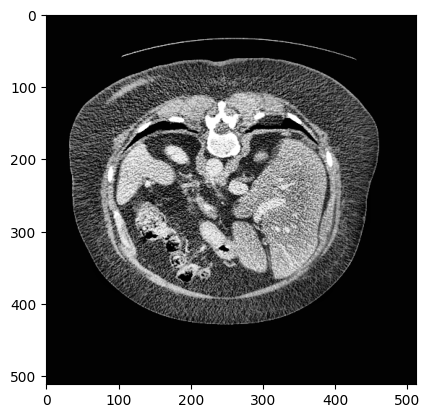

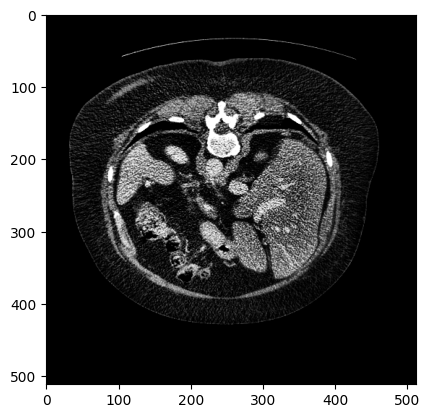

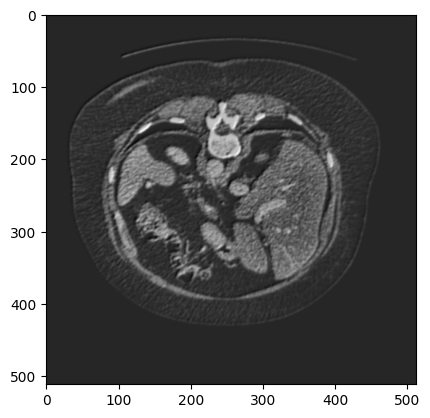

In [15]:
path = r'D:\hhf\test\images_train\liver_5_slice_0405.dcm'
img =  pydicom.dcmread(path).pixel_array
# plt.imshow(img,cmap='gray')
# plt.show()

#定义windowing函数
def windowing(img,window_width,window_center):
    minWindow= float(window_center)-0.5*float(window_width)
    new_img = (img-minWindow)/float(window_width)
    new_img[new_img<0] = 0
    new_img[new_img>1] =1
    return (new_img*255).astype('uint8')


def vesselness_enhancement(image, sigma_scale=1, alpha=0.5, beta=1.5):
    """
    使用高斯滤波和结构化元素增强图像中的线状结构。
    
    参数:
    - image: 输入的灰度图像数组。
    - sigma_scale: 高斯滤波器的sigma缩放因子。
    - alpha: 结构化元素的alpha参数。
    - beta: 结构化元素的beta参数。
    
    返回:
    - 增强后的图像数组。
    """
    # 计算高斯滤波器的sigma值
    sigma = 1.0 + sigma_scale * np.sqrt(np.mean(image**2))
    
    # 使用高斯滤波器
    smoothed_image = ndimage.gaussian_filter(image, sigma=sigma)
    
    # 创建结构化元素
    struct_elem = np.array([[0, -alpha, 0], 
                            [-1, 0, 1], 
                            [0, beta, 0]])
    
    # 应用结构化元素
    enhanced_image = ndimage.convolve(smoothed_image, struct_elem)
    
    return enhanced_image

# new_img = windowing(img,150,30)
new_img = windowing(img,400,40)
# plt.imshow(new_img,cmap='gray')
# plt.show()

# new_img = cv2.GaussianBlur(new_img, (3, 3), 0)


#图像对比度增强
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(8,8))
new_img = clahe.apply(new_img)
new_img = new_img.astype('float32') / max(abs(np.unique(new_img)))
plt.imshow(new_img,cmap='gray')
plt.show()



# print(new_img.shape)
new_img = np.power(new_img, 2.2)
# print(corrected_image.shape)
plt.imshow(new_img,cmap='gray')
plt.show()


new_img = vesselness_enhancement(new_img)
plt.imshow(new_img,cmap='gray')
plt.show()

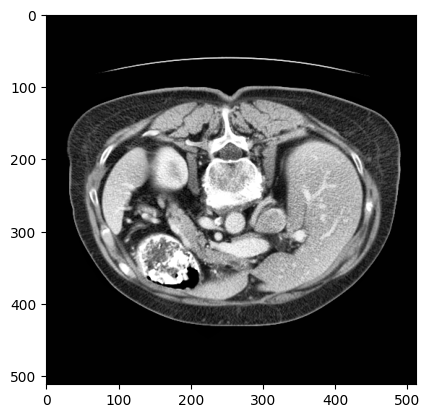

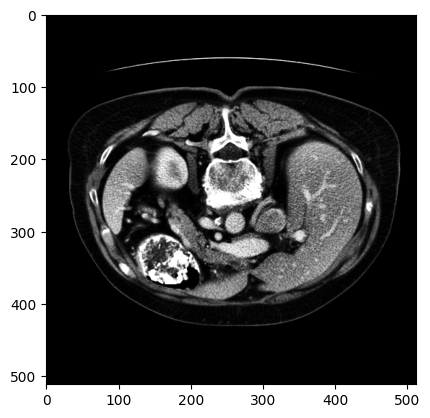

In [22]:
path = r'D:\hhf\test\images_train\liver_1_slice_0055.dcm'
img =  pydicom.dcmread(path).pixel_array
# plt.imshow(img,cmap='gray')
# plt.show()

#定义windowing函数
def windowing(img,window_width,window_center):
    minWindow= float(window_center)-0.5*float(window_width)
    new_img = (img-minWindow)/float(window_width)
    new_img[new_img<0] = 0
    new_img[new_img>1] =1
    return (new_img*255).astype('uint8')

# new_img = windowing(img,150,30)
new_img = windowing(img,400,40)
# plt.imshow(new_img,cmap='gray')
# plt.show()

# new_img = cv2.GaussianBlur(new_img, (3, 3), 0)

#图像对比度增强
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(8,8))
new_img = clahe.apply(new_img)
new_img = new_img.astype('float32') / max(abs(np.unique(new_img)))
plt.imshow(new_img,cmap='gray')
plt.show()

# print(new_img.shape)
corrected_image = np.power(new_img, 2.2)
# print(corrected_image.shape)
plt.imshow(corrected_image,cmap='gray')
plt.show()

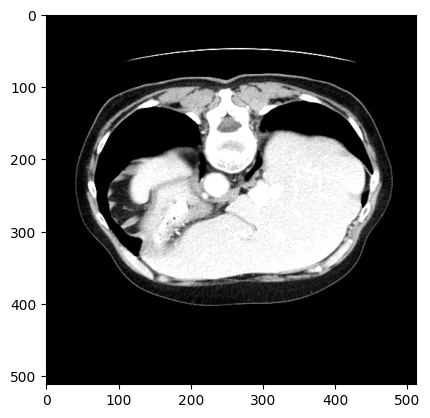

In [54]:
img =  pydicom.dcmread(r'D:\hhf\test\images_train\liver_0_slice_0065.dcm').pixel_array

#定义windowing函数
def windowing(img,window_width,window_center):
    minWindow= float(window_center)-0.5*float(window_width)
    new_img = (img-minWindow)/float(window_width)
    new_img[new_img<0] = 0
    new_img[new_img>1] =1
    return (new_img*255).astype('uint8')

new_img = windowing(img,250,0)
plt.imshow(new_img,cmap='gray')
plt.show()

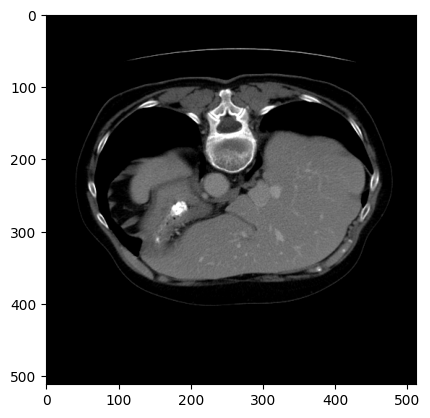

[0.00784314 0.01176471 0.01568628 0.01960784 0.02352941 0.02745098
 0.03137255 0.03529412 0.03921569 0.04313726 0.04705882 0.05098039
 0.05490196 0.05882353 0.0627451  0.06666667 0.07058824 0.07450981
 0.07843138 0.08235294 0.08627451 0.09019608 0.09411765 0.09803922
 0.10196079 0.10588235 0.10980392 0.11372549 0.11764706 0.12156863
 0.1254902  0.12941177 0.13333334 0.13725491 0.14117648 0.14509805
 0.14901961 0.15294118 0.15686275 0.16078432 0.16470589 0.16862746
 0.17254902 0.1764706  0.18039216 0.18431373 0.1882353  0.19215687
 0.19607843 0.2        0.20392157 0.20784314 0.21176471 0.21568628
 0.21960784 0.22352941 0.22745098 0.23137255 0.23529412 0.23921569
 0.24313726 0.24705882 0.2509804  0.25490198 0.25882354 0.2627451
 0.26666668 0.27058825 0.27450982 0.2784314  0.28235295 0.28627452
 0.2901961  0.29411766 0.29803923 0.3019608  0.30588236 0.30980393
 0.3137255  0.31764707 0.32156864 0.3254902  0.32941177 0.33333334
 0.3372549  0.34117648 0.34509805 0.34901962 0.3529412  0.35686

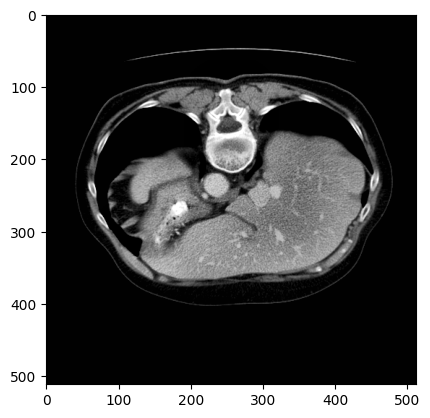

In [58]:
img =  pydicom.dcmread(r'D:\hhf\test\images_train\liver_0_slice_0065.dcm').pixel_array

#定义windowing函数
def windowing(img,window_width,window_center):
    minWindow= float(window_center)-0.5*float(window_width)
    new_img = (img-minWindow)/float(window_width)
    new_img[new_img<0] = 0
    new_img[new_img>1] =1
    return (new_img*255).astype('uint8')

new_img = windowing(img,500,150)
plt.imshow(new_img,cmap='gray')
plt.show()

#图像对比度增强
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(8,8))
new_img = clahe.apply(new_img)
new_img = new_img.astype('float32') / max(abs(np.unique(new_img)))
print(np.unique(new_img))
plt.imshow(new_img,cmap='gray')
plt.show()

[-1024 -1023 -1022 ...   792   809   851]


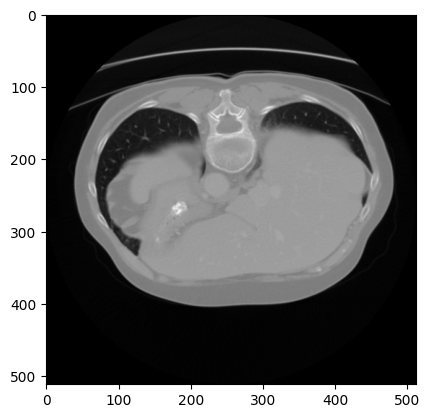

[-1.         -0.99902344 -0.9980469  ...  0.7734375   0.79003906
  0.8310547 ]


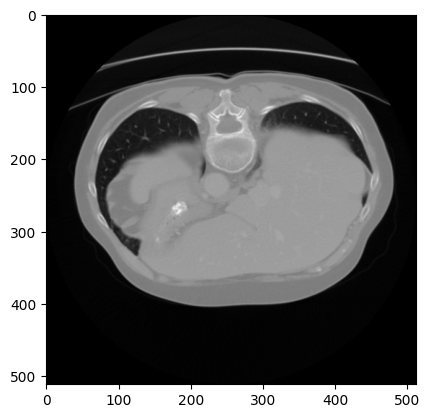

In [61]:
new_img =  pydicom.dcmread(r'D:\hhf\test\images_train\liver_0_slice_0065.dcm').pixel_array
print(np.unique(new_img))
plt.imshow(new_img,cmap='gray')
plt.show()

new_img = new_img.astype('float32') / max(abs(np.unique(new_img)))
print(np.unique(new_img))
plt.imshow(new_img,cmap='gray')
plt.show()

[0 1]


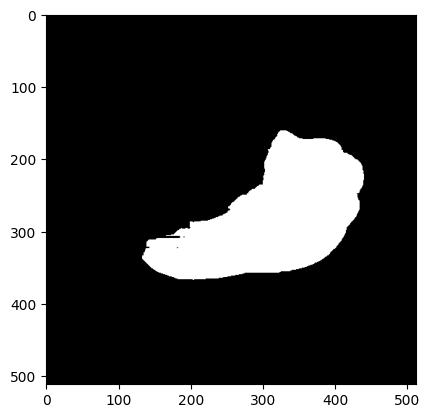

[0. 1.]


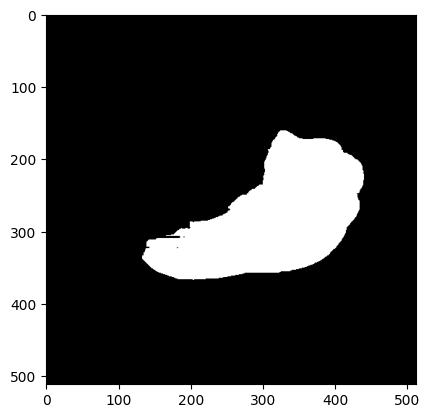

In [62]:
new_img =  pydicom.dcmread(r'D:\hhf\test\labels_train\0-1\liver_0_slice_0065.dcm').pixel_array
print(np.unique(new_img))
plt.imshow(new_img,cmap='gray')
plt.show()

new_img = new_img.astype('float32') / max(abs(np.unique(new_img)))
print(np.unique(new_img))
plt.imshow(new_img,cmap='gray')
plt.show()

[0 1]


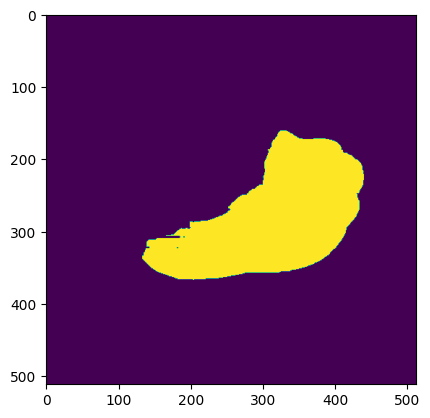

In [63]:
new_img =  pydicom.dcmread(r'D:\hhf\test\labels_train\0-1\liver_0_slice_0065.dcm').pixel_array
print(np.unique(new_img))
plt.imshow(new_img)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib
from tqdm import tqdm

# 参数设置
radius = 1  # 障碍球半径
source = np.array([271 ,186 ,153])  # 点源位置
targets = np.array([
            [265.6         ,69.6         ,66.        ],
            [158.4         ,66.4         ,71.        ],
            [362.28571429  ,67.85714286  ,86.5       ],
            [263.28571429  ,67.42857143 ,142.5       ]
])


# 找到x、y、z轴上的最小值和最大值
min_x, min_y, min_z = targets.min(axis=0)
max_x, max_y, max_z = targets.max(axis=0)
x_values = np.arange(min_x, max_x, 10)
y_values = np.arange(min_y, max_y, 10)
z_values = np.arange(min_z, max_z, 10)

# 使用meshgrid创建三维网格
xx, yy, zz = np.meshgrid(x_values, y_values, z_values, indexing='ij')

# 将网格展平为一维数组
points_in_box = np.array(np.meshgrid(x_values, y_values, z_values, indexing='ij')).T.reshape(-1, 3)

targets = points_in_box

marker_img=nib.load(r"C:\Users\allstar\Desktop\body_model\Marker\processed_image_abs.nii.gz")
nii_data3 = marker_img.get_fdata()

# 获取所有像素值为1的点的索引
indices3 = np.where(nii_data3 > 0)

# 使用 NumPy 的向量化操作来创建障碍点的数组
points3 = np.vstack((indices3,)).T

boundary_img=nib.load(r"C:\Users\allstar\Desktop\body_model\boundary_new\boundary.nii.gz")
nii_data2 = boundary_img.get_fdata()

# 获取所有像素值为1的点的索引
indices2 = np.where(nii_data2 > 0)

# 使用 NumPy 的向量化操作来创建障碍点的数组
points2 = np.vstack((indices2,)).T

# 读取.nii.gz文件
nii_img = nib.load(r'C:\Users\allstar\Desktop\body_model\bone\bone.nii')  # 替换为你的文件路径
nii_data = nii_img.get_fdata()

# 获取所有像素值为1的点的索引
indices = np.where(nii_data > 0)

# 使用 NumPy 的向量化操作来创建障碍点的数组
points = np.vstack((indices,)).T

obstacles = np.concatenate((points, points2,points3), axis=0)

pixdim = nii_img.header['pixdim']

# 计算射线与障碍球的交点
def ray_intersects(obstacles, source, directions):
    # 计算射线与球的交点
    oc = obstacles - source
    a = np.sum(directions**2, axis=1)
    b = 2 * np.sum(directions * oc, axis=1)
    c = np.sum(oc**2, axis=1) - radius**2
    discriminant = b**2 - 4*a*c
    
    # 计算t1和t2，只考虑非负的解
    t1 = (-b[discriminant>=0] - np.sqrt(discriminant[discriminant>=0])) / (2*a)
    t2 = (-b[discriminant>=0] + np.sqrt(discriminant[discriminant>=0])) / (2*a)
    
    # 选择有效的t值
    t = np.maximum(t1, t2)
    
    # 检查t是否大于0
    valid_t = t > 0
    
    return valid_t

# 计算每条射线碰到的障碍球数量
intersection_counts = []
for target in tqdm(targets):
    direction = (source - target) / np.linalg.norm(source - target)  # 单位方向向量
    intersects = ray_intersects(obstacles, source, direction[None, :])  # 扩展方向向量
    count = np.sum(intersects)
    intersection_counts.append(count)
    
    
# 输出每条射线碰到的障碍球数量
# print(intersection_counts)
zero_indices  = np.where( np.array(intersection_counts) == 0) #没有碰到障碍的下标
distances = np.linalg.norm(targets - source, axis=1) # 计算每个路径的距离


distances_zero = distances[zero_indices]    # 没有碰到障碍的距离
# distances = distances_zero[distances_zero<150] # 筛选出距离小于150的路径

distances_index = np.where( distances_zero < 150)
print(distances_index)

# print(len(distances[zero_indices])) # 没有碰到障碍的路径数量
# print(distances[np.argsort(distances[distances_index])[0]]) # 没有碰到障碍的最短路径下标
# print(distances[np.argsort(distances[zero_indices])[0]]) # 没有碰到障碍的最短路径下标
# print(targets[np.argsort(distances[zero_indices])[0]][0],targets[np.argsort(distances[zero_indices])[0]][1],targets[np.argsort(distances[zero_indices])[0]][2])

100%|██████████| 168/168 [00:49<00:00,  3.37it/s]

(array([  7,   8,  19,  20,  21,  22,  23,  24,  25,  26,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], dtype=int64),)
158.39166644744918
133.41634082825087
218.4 66.4 126.0


In [12]:
import os
import glob
import numpy as np
import pydicom



def read_dicom_series(directory):
    # 获取文件夹中所有.dcm文件的路径
    dcm_files = sorted(glob.glob(os.path.join(directory, '*.dcm')))   
    # 读取第一个DICOM文件以获取图像尺寸和深度信息
    ref_image = pydicom.dcmread(dcm_files[0])
    
    pixel_spacing = ref_image.PixelSpacing  # 返回一个包含x和y距离的元组

    # 获取体素的z方向距离（层间距）
    slice_thickness = ref_image.SliceThickness  # 返回z方向的距离
    
    print(pixel_spacing, slice_thickness)
    
    image_shape = ref_image.pixel_array.shape
    depth = len(dcm_files)  # DICOM序列的深度（即图像数量）
    
    # 初始化一个3D数组来存储所有DICOM图像
    images = np.stack([pydicom.dcmread(f).pixel_array for f in dcm_files])
    
    return images

# 指定包含DICOM文件的文件夹路径
dicom_directory = r"C:\Users\allstar\Desktop\213\bone-213"

# 读取DICOM序列并生成数组
dicom_array = read_dicom_series(dicom_directory)

dicom_array = np.transpose(dicom_array, (1, 2, 0))

# 打印数组的形状以确认
print("Shape of the DICOM array:", dicom_array.shape)
print(dicom_array)

[1, 1] 1.5
Shape of the DICOM array: (512, 512, 174)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [11]:
import nibabel as nib


# 1. 读取.nii.gz文件
image_path = r'C:\Users\allstar\Desktop\213\CT_001_1.2.3.4.5_0000.nii.gz'
image_obj = nib.load(image_path)

x = image_obj.header['pixdim']
print(f'X轴体素尺寸: {x[1]} mm')
print(f'Y轴体素尺寸: {x[2]} mm')
print(f'Z轴体素尺寸: {x[3]} mm')


X轴体素尺寸: 1.0 mm
Y轴体素尺寸: 1.0 mm
Z轴体素尺寸: 1.5 mm
